In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from collections import Counter

In [3]:
df_time = pd.read_csv('./bin/10_2_time_result.csv')

In [4]:
df_time

,Replicate,Gene_tree,reconcILSTime_iterative,reconcILSTime_recurssive,dlcparTime
0,0,"(((A,A),A),(B,C));",0.141141,0.207391,1.282488
1,1,"((B,B),B);",0.051518,0.117944,1.059296
2,2,"((A,B),C);",0.040750,0.038840,1.091949
3,3,"((((A,A),B),C),A);",0.236308,0.176561,1.031139
4,4,"((C,A),B);",0.074284,0.058241,1.095146
...,...,...,...,...,...
815,994,"((C,B),A);",0.019717,0.087366,0.997531
816,995,"((C,B),A);",0.023510,0.020246,1.043520
817,996,"((C,C),(((C,C),B),A));",0.583614,0.547788,1.008023
818,997,"(A,B);",0.013993,0.016262,1.045870


In [5]:
df_time_high_ILS = pd.read_csv('./bin/10_3_high_ILS_time_result.csv')


<AxesSubplot:>

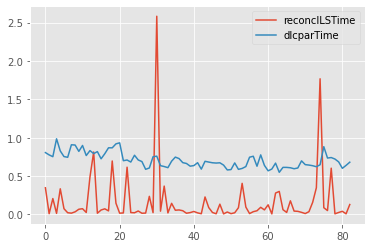

In [6]:
df_time_high_ILS[['reconcILSTime','dlcparTime']].plot()

In [7]:
df_time[['reconcILSTime_iterative','reconcILSTime_recurssive','dlcparTime']].mean()

reconcILSTime_iterative     0.283165
reconcILSTime_recurssive    0.230383
dlcparTime                  1.043651
dtype: float64

<AxesSubplot:>

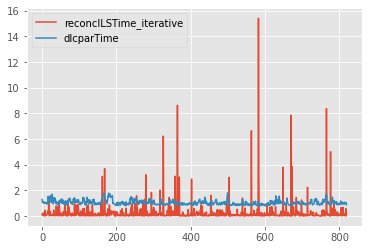

In [70]:
df_time[['reconcILSTime_iterative','dlcparTime']].plot()

In [ ]:
df_time =df_time[df_time.reconcILSTime<50]

In [ ]:
df_diff_D = df_time[df_time['dlcparTime']<df_time['reconcILSTime']].fillna('')
df_diff_D

In [99]:
df_diff_D[(df_diff_D.reconcILSTime >100)]['Gene_tree']

Series([], Name: Gene_tree, dtype: object)

In [24]:
df = pd.read_csv('./bin/10_2_result.csv')

In [25]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
0,True Process,0,"(((A,A),A),(B,C));","(A,(B,C));",2,0,0,0,0,0
1,DLCpar,0,"(((A,A),A),(B,C));","(A,(B,C));",2,0,0,0,0,0
2,Our_algorithm_ite,0,"(((A,A),A),(B,C));","(A,(B,C));",2,0,0,0,0,0
3,Our_algorithm_recu,0,"(((A,A),A),(B,C));","(A,(B,C));",2,0,0,0,0,0
4,True Process,1,"((B,B),B);","(A,(B,C));",2,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...
3275,Our_algorithm_recu,997,"(A,B);","(A,(B,C));",0,0,0,1,0,0
3276,True Process,999,"((B,C),(A,C));","(A,(B,C));",1,2,2,0,0,0
3277,DLCpar,999,"((B,C),(A,C));","(A,(B,C));",1,0,0,2,0,0
3278,Our_algorithm_ite,999,"((B,C),(A,C));","(A,(B,C));",1,2,0,0,0,0


In [14]:
df1= df[['Replicate','Gene_tree','Duplication','NNI','Loss']][(df.Process == 'Our_algorithm_ite')]
df2=df[['Replicate','Gene_tree','Duplication','NNI','Loss']][(df.Process == 'Our_algorithm_recu')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df2.compare(df1).astype('category')

In [15]:
df2

Replicate


In [16]:
df[(df.Replicate == 933)]

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,DLCILS,Loss,Hemiplasy,RHemiplasy
3056,True Process,933,"((B,B),C);","(A,(B,C));",1,0,0,1,0,1
3057,DLCpar,933,"((B,B),C);","(A,(B,C));",1,0,0,0,0,0
3058,Our_algorithm_ite,933,"((B,B),C);","(A,(B,C));",1,0,0,1,0,0
3059,Our_algorithm_recu,933,"((B,B),C);","(A,(B,C));",1,0,0,1,0,0


In [26]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
True_DLCILS= pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['DLCILS'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [32]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [33]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "DLCpar")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['Loss'])
ETE3_DLCILS = pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['DLCILS'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [34]:
print(len(True_Duplication))

820


In [35]:
print(len(O_Duplication))

820


In [36]:
print(len(ETE3_Duplication))

820


In [37]:
True_Duplication['Replicate']=[i for i in range(820)]
O_Duplication['Replicate']=[i for i in range(820)]
ETE3_Duplication['Replicate']=[i for i in range(820)]


In [38]:
true_reconils_dups= pd.DataFrame(concat_O-concat_true)
val =['reconcILS' for i in range(820)]
true_reconils_dups['Algorithm']=val
#true_reconils_dups['Replicate']=[i for i in range(99)]

In [39]:
true_ete3_dups= pd.DataFrame((concat_ETE3-concat_true))
val =['DLCpar' for i in range(820)]
true_ete3_dups['Algorithm']=val

#true_ete3_dups['Replicate']=[i for i in range(99)]

In [40]:
true_reconils_dups

,Duplication,Loss,Algorithm
0,0,0,reconcILS
1,0,0,reconcILS
2,0,0,reconcILS
3,-1,0,reconcILS
4,0,0,reconcILS
...,...,...,...
815,0,0,reconcILS
816,0,0,reconcILS
817,-3,-3,reconcILS
818,0,0,reconcILS


In [41]:
true_ete3_dups

,Duplication,Loss,Algorithm
0,0,0,DLCpar
1,0,-2,DLCpar
2,0,0,DLCpar
3,-1,0,DLCpar
4,0,0,DLCpar
...,...,...,...
815,0,0,DLCpar
816,0,0,DLCpar
817,-3,-1,DLCpar
818,0,0,DLCpar


In [42]:
val=0
for i in list(true_reconils_dups['Duplication']):
    if i!=0:
        val=val+1

In [43]:
val

293

In [44]:
new =pd.concat([true_reconils_dups,true_ete3_dups],axis=0)
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,reconcILS,Duplication,0
1,reconcILS,Duplication,0
2,reconcILS,Duplication,0
3,reconcILS,Duplication,-1
4,reconcILS,Duplication,0
...,...,...,...
3275,DLCpar,Loss,0
3276,DLCpar,Loss,0
3277,DLCpar,Loss,-1
3278,DLCpar,Loss,0


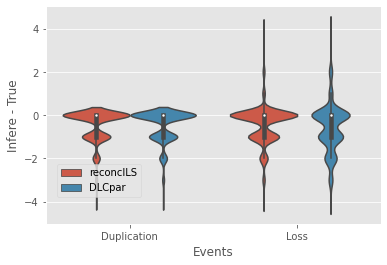

In [45]:
#ax =sns.boxplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))
sns.violinplot(x="variable", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm']))

plt.xlabel("Events")
plt.legend(bbox_to_anchor=(0.3,0.3))
plt.ylabel("Infere - True")
plt.savefig('box_plot.jpg', dpi=500)


In [46]:
from folium.plugins import HeatMap
import folium
df1= df[['Replicate','Duplication']][(df.Process == 'DLCpar')]
df2=df[['Replicate','Duplication']][(df.Process == 'True Process')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')
df2  = df2['Duplication']
CrosstabResult = pd.crosstab(index=df2['self'], columns=df2['other'])

ax1 = HeatMap(CrosstabResult, radius = 10, gradient={1000: 'blue', 3000: 'lime', 5000: 'red'})

plt.show()

In [47]:
df1

,Duplication
Replicate,
0,2
1,2
2,0
3,2
4,0
...,...
994,0
995,0
996,3


In [48]:
df1= df[['Replicate','Loss']][(df.Process == 'Our_algorithm')]
df2=df[['Replicate','Loss']][(df.Process == 'True Process')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')
df2  = df2['Loss']
CrosstabResult = pd.crosstab(index=df2['self'], columns=df2['other'])
ax1 = sns.heatmap(CrosstabResult, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

ValueError: Can only compare identically-labeled DataFrame objects

In [ ]:
df1= df[['Replicate','Loss']][(df.Process == 'Our_algorithm')]
df2=df[['Replicate','Loss']][(df.Process == 'DLCpar')]

df1.set_index('Replicate',inplace=True)
df2.set_index('Replicate',inplace=True)

df2= df1.compare(df2).astype('category')
df2  = df2['Loss']
CrosstabResult = pd.crosstab(index=df2['self'], columns=df2['other'])
ax1 = sns.heatmap(CrosstabResult, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [ ]:
df[['Replicate','Process','Duplication']][(df.Process == 'Our_algorithm')]

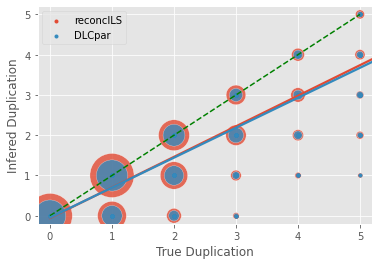

<Figure size 432x288 with 0 Axes>

In [49]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

result1 =pd.concat([True_Duplication['Duplication'],O_Duplication['Duplication']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_Duplication['Duplication'],ETE3_Duplication['Duplication']], ignore_index=True,axis=1)
result22=result12.groupby([0,1]).size().reset_index(name='Count')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')

sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

# show the graph

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')




plt.xlabel("True Duplication")
plt.ylabel("Infered Duplication")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_dups.png', dpi=500)

plt.show()
plt.clf()

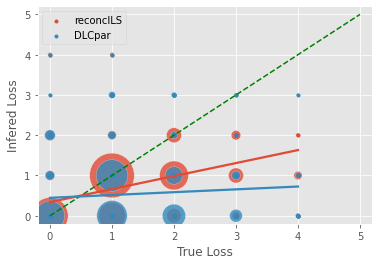

<Figure size 432x288 with 0 Axes>

In [50]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


result1 =pd.concat([TRUE_Loss['Loss'],O_Loss['Loss']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')

result12 =pd.concat([TRUE_Loss['Loss'],ETE3_Loss['Loss']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True Loss")
plt.ylabel("Infered Loss")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_loss.png', dpi=500)

plt.show()
plt.clf()

In [120]:
r =result1.astype('category')

In [121]:
r

,0,1
0,0,0
1,2,2
2,0,0
3,1,1
4,0,0
...,...,...
815,0,0
816,0,0
817,3,0
818,1,1


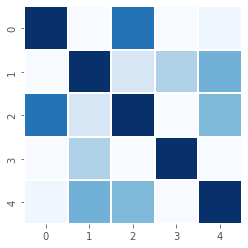

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(50).reshape(10,5))
corr = df.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

In [32]:
np.array([list(result1[0]), list(result1[1])])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

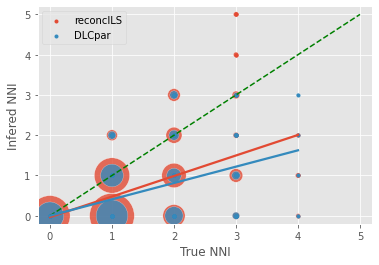

<Figure size 432x288 with 0 Axes>

In [51]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt






result1 =pd.concat([TRUE_NNI['NNI'],O_NNI['NNI']], ignore_index=True,axis=1)
result11=result1.groupby([0,1]).size().reset_index(name='Count')
result12 =pd.concat([True_DLCILS['DLCILS'],ETE3_DLCILS['DLCILS']], ignore_index=True,axis=1)
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
result22=result12.groupby([0,1]).size().reset_index(name='Count')
x = [0,1, 2, 3, 4, 5]
y = [0,1, 2, 3, 4, 5]

# Create the line
line = plt.plot(x, y, '--',color='g')
#sns.lmplot(x=result1[0], y=result1[1], data=result1);
sns.scatterplot(data=result11, x=0, y=1, size="Count", legend=False, sizes=(20, 2000), alpha=0.8)
sns.scatterplot(data=result22, x=0, y=1, size="Count", legend=False, sizes=(10, 1000), alpha=0.8)

ax=sns.regplot(x=result1[0], y=result1[1], data=result1,marker=".", fit_reg=True, scatter_kws={'alpha':1}, ci=None, label='reconcILS')
ax=sns.regplot(x=result12[0], y=result12[1], data=result12, marker=".",fit_reg=True,scatter_kws={'alpha':1}, ci=None, label='DLCpar')



plt.xlabel("True NNI")
plt.ylabel("Infered NNI")
# Show the plot
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)

plt.legend(bbox_to_anchor=(0.28,1))

plt.savefig('regex_NNI.png', dpi=500)

plt.show()
plt.clf()

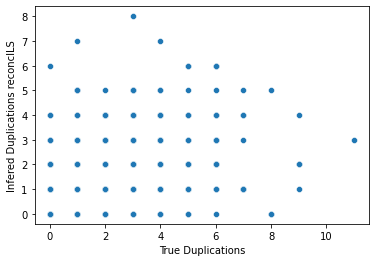

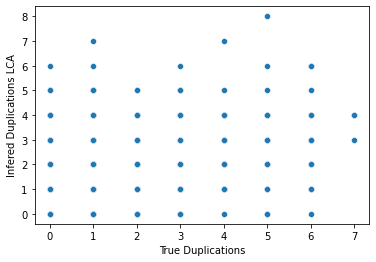

In [223]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

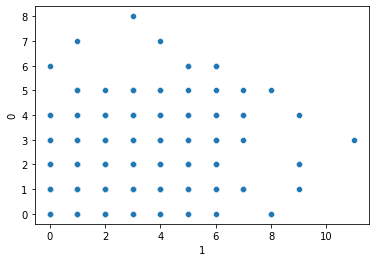

In [224]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [52]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Loss']),columns=['NNI']))

In [53]:
rho

0.12289481267821467

In [55]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Loss']),columns=['NNI']))

In [56]:
rho

0.5283406309065378

In [57]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['Duplication']),columns=['NNI']))

In [62]:
rho

0.8578591520209818

In [63]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Duplication']),columns=['NNI']))

In [64]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_ite")]['Duplication']),columns=['NNI']))

In [65]:
rho

0.8578591520209818

In [66]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['DLCILS']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "DLCpar")]['DLCILS']),columns=['NNI']))

In [134]:
rho

0.4389436241210259

In [67]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "Our_algorithm_recu")]['NNI']),columns=['NNI']))

In [68]:
rho

0.5427944276016681